<a href="https://colab.research.google.com/github/mustafa-vu/dmpm-qb/blob/main/qb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use a suitable data-set from kaggle.com. Identify whether any variable has any missing values. Impute 
some of the variables that have missing values using their corresponding mean values. Verify whether 
your task has been correctly done. Compute the Kurtosis and Skewness of the variables and interpret the 
results obtained. Determine the "summary" information for the numerical variables. Identify the
"distributions" of the numerical variables and plot the distributions. Transform the numeric variables into 
their natural log values and scale [0 - 1] values. Check whether the numeric variables follow normality 
conditions. Find the correlation matrix for all the variables in the dataset and plot the graph of the 
correlation matrix. From the given dataset partition the data into 70-15-15 divisions so to construct the 
training, validation and test datasets. Any additional ways of Data Exploration & Visualization will be 
appreciated

In [26]:
install.packages("dplyr")
library(dplyr)
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
data <- read.csv("/content/pva97nk.csv")


2. Identify the variables in the file "pva97nk.csv" and determine whether any variable has any missing values.

In [9]:
colnames(data)

[1] "TargetB"          "ID"               "TargetD"          "GiftCnt36"       
 [5] "GiftCntAll"       "GiftCntCard36"    "GiftCntCardAll"   "GiftAvgLast"     
 [9] "GiftAvg36"        "GiftAvgAll"       "GiftAvgCard36"    "GiftTimeLast"    
[13] "GiftTimeFirst"    "PromCnt12"        "PromCnt36"        "PromCntAll"      
[17] "PromCntCard12"    "PromCntCard36"    "PromCntCardAll"   "StatusCat96NK"   
[21] "StatusCatStarAll" "DemCluster"       "DemAge"           "DemGender"       
[25] "DemHomeOwner"     "DemMedHomeValue"  "DemPctVeterans"   "DemMedIncome"

In [7]:
for (col in colnames(data)) { 
  if (any(is.na(data[,col]))) 
  { 
    print(col) 
    print("The above column has null values") 
    } 
  }

3. Impute some of the variables that have missing values using their corresponding mean values. Verify whether your task has been correctly done. Since it has been mentioned for the column targetD, that the missing values actually mean no donations, we will fill that with zero. The rest columns with missing values can be filled with mean values For TargetD -

In [22]:
#For TargetD - > 
data <- mutate_at(data, c("TargetD"), ~replace(., is.na(.), 0))

for(i in 1:ncol(data)){ 
  data[is.na(data[,i]), i] <- mean(data[,i], na.rm = TRUE) 
  }

Warning message in mean.default(data[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(data[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(data[, i], na.rm = TRUE):
“argument is not numeric or logical: returning NA”


4. Compute the Kurtosis and Skewness of the variables and interpret the results obtained. Kurtosis and Skewness are the two ways to measure the shape of the distribution. Skewness is a measure of the asymmetry of a distribution. This value can be positive or negative. 

  1. A negative skew indicates that the tail is on the left side of the distribution, which extends towards more negative values. 
  2. A positive skew indicates that the tail is on the right side of the distribution, which extends towards more positive values. 
  3. A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.

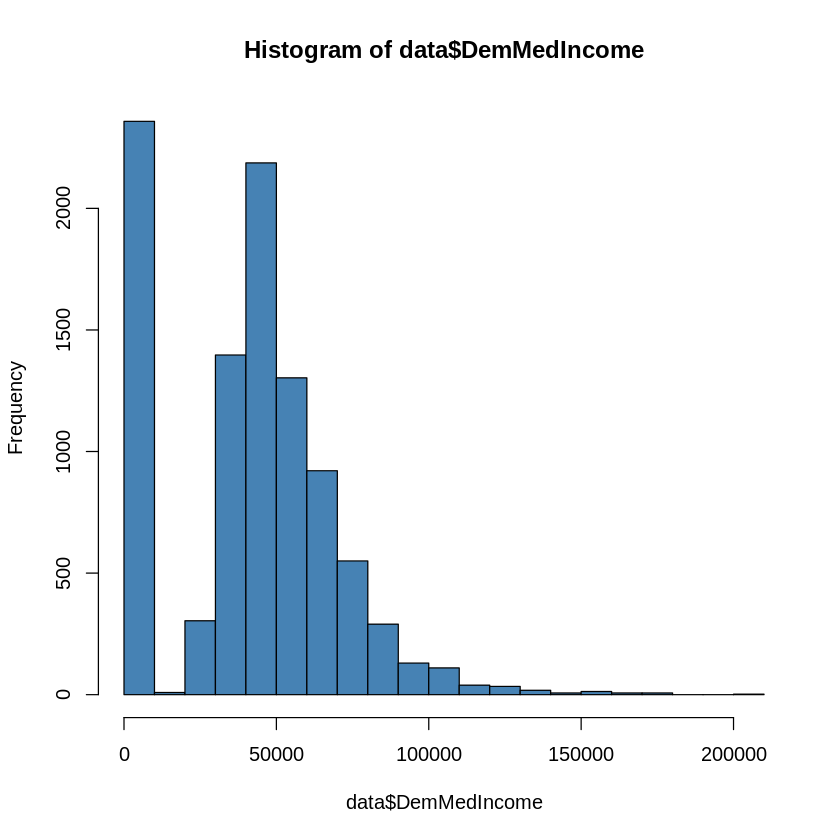

In [23]:
hist(data$DemMedIncome, col='steelblue')

In [27]:
#calculate skewness 
skewness(data$DemMedIncome)

[1] 0.3099769

Since our skewness is positive skew it indicates that the tail is on the left side of the distribution. This also means that the mean and median will be greater than the mode. Since the measure of skewness is not so much we can also say that the distribution is nearly symmetrical.

In [ ]:
hist(data$TargetD, col='steelblue')

In [28]:
#calculate skewness 
skewness(data$TargetD)

[1] 4.170038

 hist(data$DemMedHomeValue, col='steelblue')

In [ ]:
#calculate skewness
skewness(data$DemMedHomeValue)

Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution. 
  1. The kurtosis of a normal distribution is 3. 
  2. If a given distribution has a kurtosis less than 3, it is said to be platykurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution. 
  3. If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.

In [29]:
kurtosis(data$DemMedHomeValue)

[1] 9.447416

5. Determine the "summary" information for the numerical variables

This tells us that the data for DemMedHomeValue is Leptokurtic which means it tends to produce more number of outliers than the normal distribution

In [31]:
summary (data)

    TargetB          ID            TargetD          GiftCnt36     
 Min.   :0.0   Min.   :    12   Min.   :  0.000   Min.   : 0.000  
 1st Qu.:0.0   1st Qu.: 48836   1st Qu.:  0.000   1st Qu.: 2.000  
 Median :0.5   Median : 99106   Median :  0.500   Median : 3.000  
 Mean   :0.5   Mean   : 97975   Mean   :  7.812   Mean   : 3.205  
 3rd Qu.:1.0   3rd Qu.:148539   3rd Qu.: 13.000   3rd Qu.: 4.000  
 Max.   :1.0   Max.   :191779   Max.   :200.000   Max.   :16.000  
   GiftCntAll    GiftCntCard36   GiftCntCardAll    GiftAvgLast    
 Min.   : 1.00   Min.   :0.000   Min.   : 0.000   Min.   :  0.00  
 1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 2.000   1st Qu.: 10.00  
 Median : 8.00   Median :1.000   Median : 4.000   Median : 15.00  
 Mean   :10.51   Mean   :1.857   Mean   : 5.582   Mean   : 16.02  
 3rd Qu.:15.00   3rd Qu.:3.000   3rd Qu.: 8.000   3rd Qu.: 20.00  
 Max.   :91.00   Max.   :9.000   Max.   :41.000   Max.   :450.00  
   GiftAvg36        GiftAvgAll     GiftAvgCard36     GiftTimeL

6. Identify the "distributions" of the numerical variables and plot the distributions

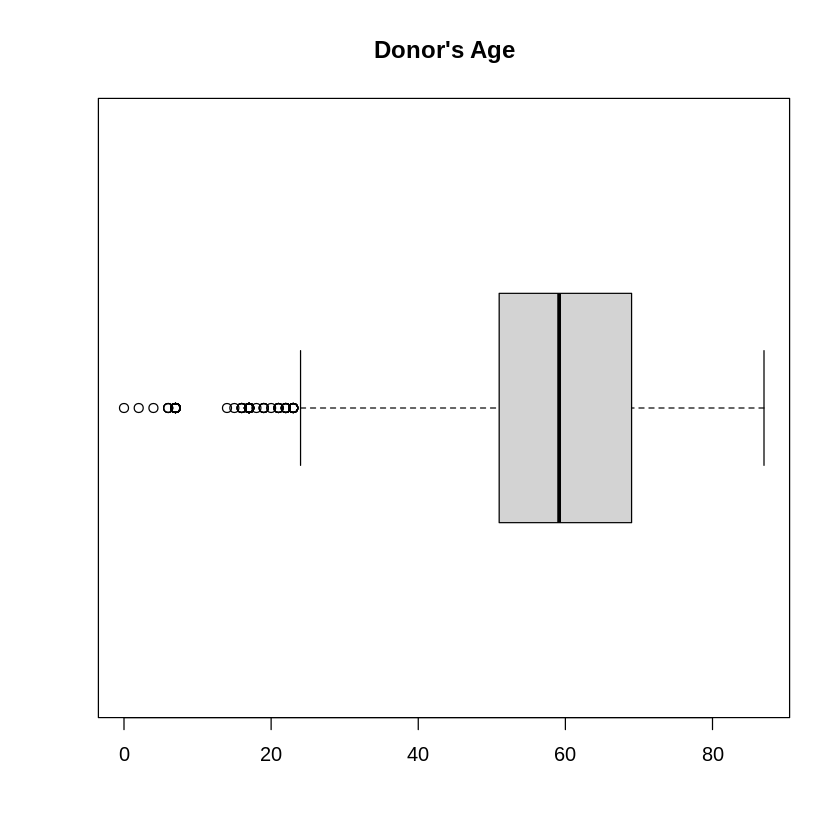

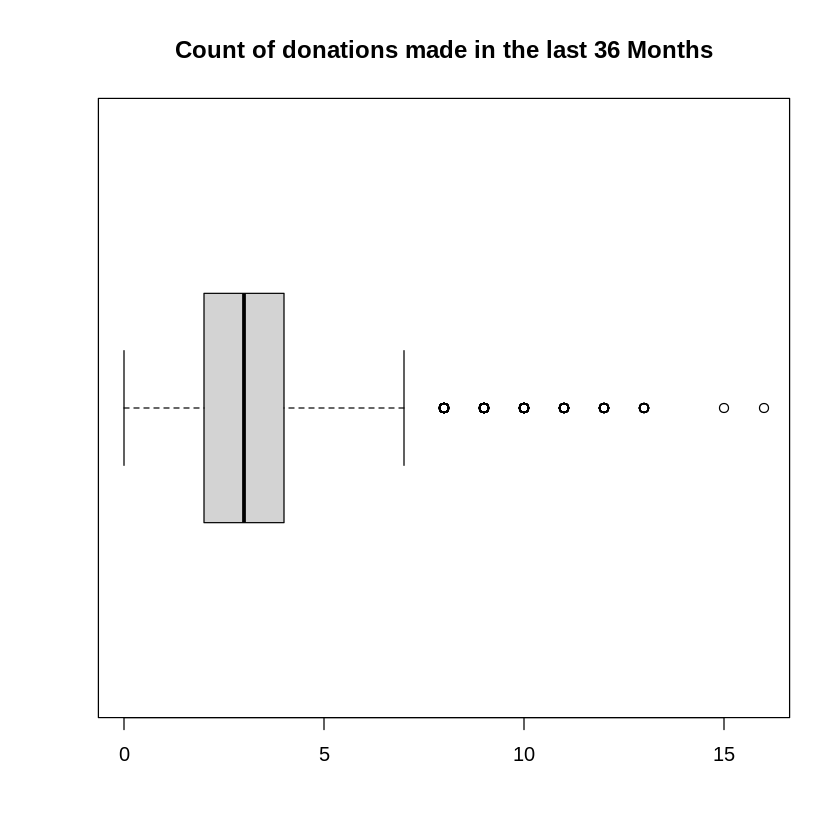

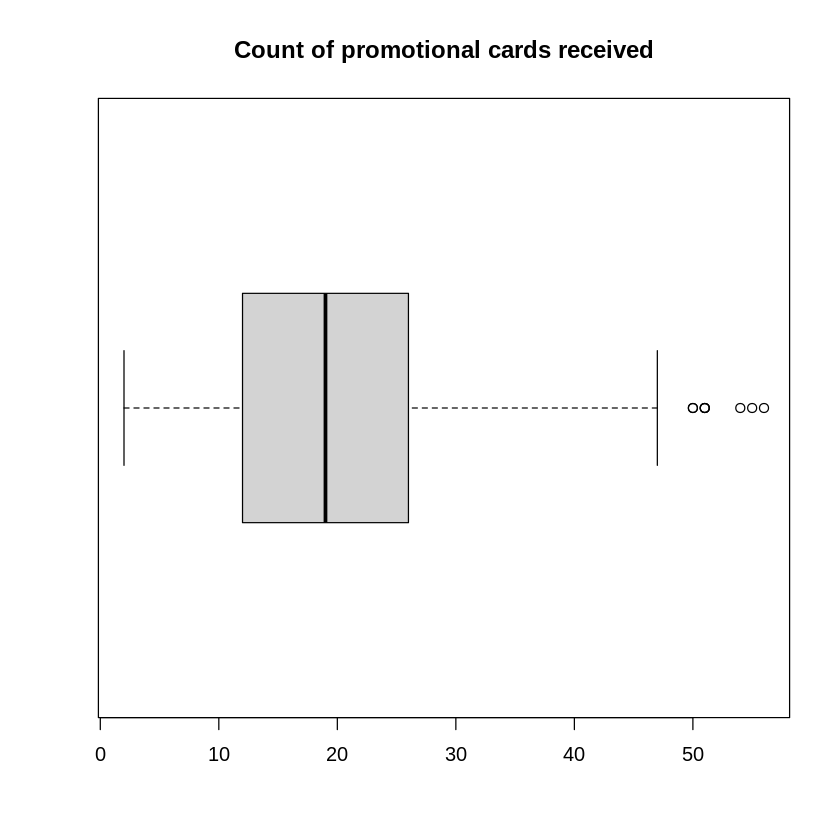

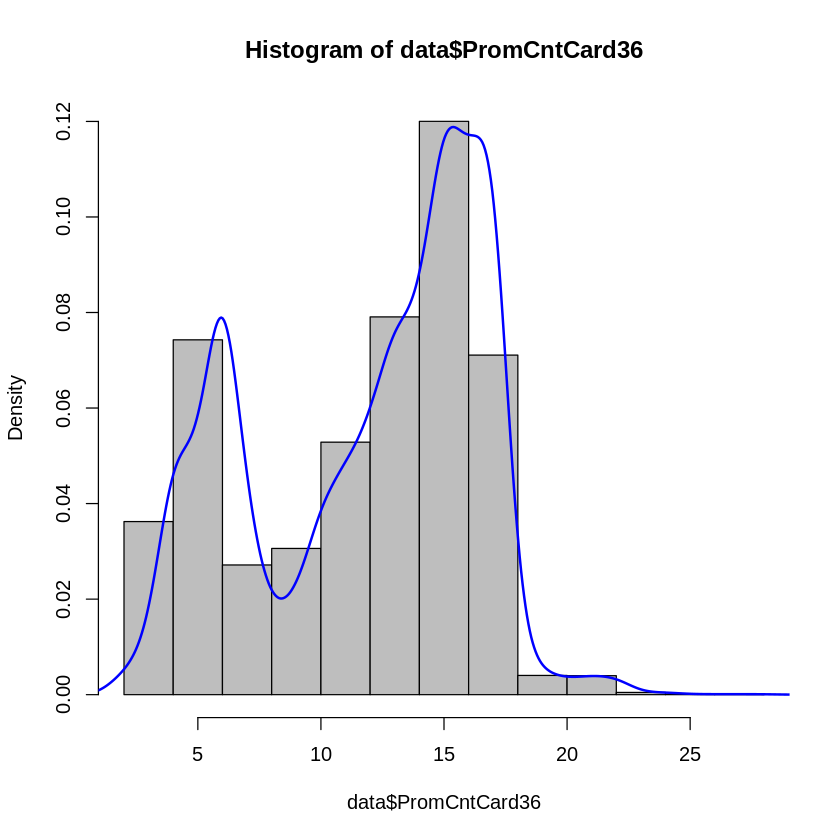

In [34]:
boxplot(data$DemAge, horizontal=TRUE, main="Donor's Age") 
boxplot(data$GiftCnt36, horizontal=TRUE, main="Count of donations made in the last 36 Months") 
boxplot(data$PromCntCardAll, horizontal=TRUE, main="Count of promotional cards received") 
# curve 
hist(data$PromCntCard36, prob=TRUE, col="grey") # prob=TRUE for probabilities not counts 
lines(density(data$PromCntCard36), col="blue", lwd=2) # add a density estimate with defaults

7. Transform the numeric variables into their natural log values and scale [0 - 1] values.

In [36]:
datanum<-Filter(is.numeric, data) 
datanum=log(datanum) 
head(datanum)

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,⋯,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-Inf,9.614071,-Inf,0.6931472,1.386294,0.0000000,1.098612,2.833213,2.602690,2.224624,⋯,3.258097,1.0986123,2.079442,2.564949,-Inf,-Inf,4.080091,-Inf,-Inf,-Inf
2,-Inf,8.747352,-Inf,0.0000000,2.079442,-Inf,1.098612,2.995732,2.995732,2.765060,⋯,4.369448,1.6094379,1.609438,3.178054,-Inf,3.135494,4.204693,12.13779,4.442651,-Inf
3,0,10.738785,1.386294,1.7917595,3.713572,1.0986123,2.995732,1.791759,1.642873,1.316408,⋯,3.931826,1.6094379,2.397895,3.091042,0,-Inf,4.080091,11.38054,3.583519,10.56489
4,0,12.133163,2.302585,1.0986123,2.484907,1.0986123,2.079442,2.302585,2.159869,2.140066,⋯,3.784190,0.6931472,1.791759,2.772589,0,-Inf,4.080091,11.84367,3.295837,10.56983
5,-Inf,10.296779,-Inf,0.0000000,0.000000,0.0000000,0.000000,2.995732,2.995732,2.995732,⋯,2.564949,1.3862944,1.945910,1.791759,-Inf,3.555348,3.970292,12.03231,3.610918,11.17758
6,0,11.631881,2.397895,1.0986123,2.397895,0.6931472,2.197225,2.397895,2.335052,2.112635,⋯,3.806662,1.6094379,2.302585,3.091042,0,-Inf,3.850148,12.44154,-Inf,11.43512


8. Check whether the numeric variables follow normality conditions

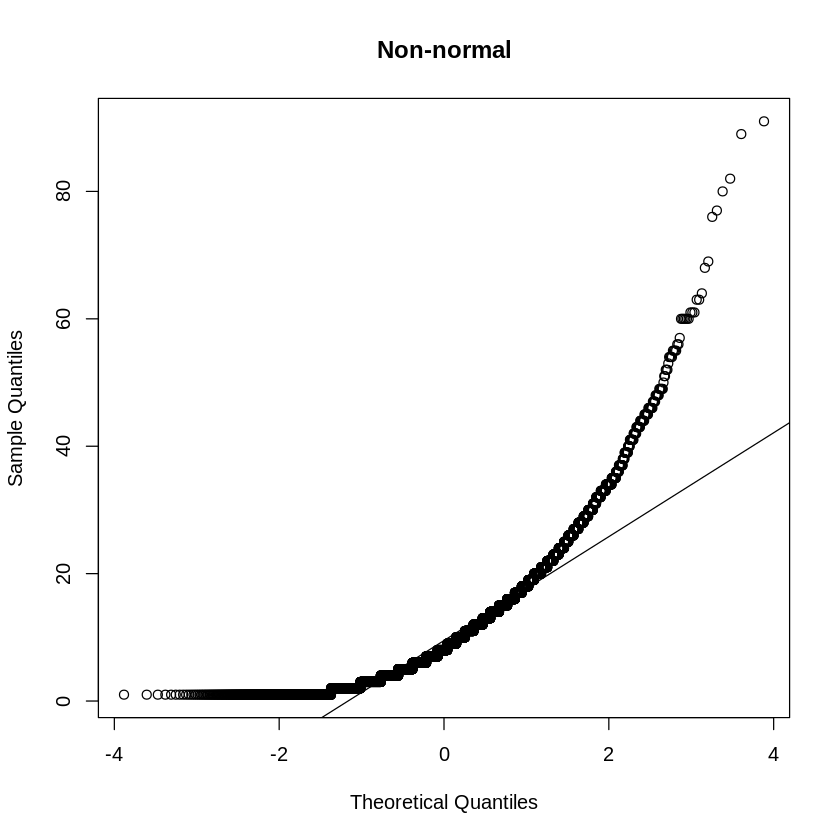

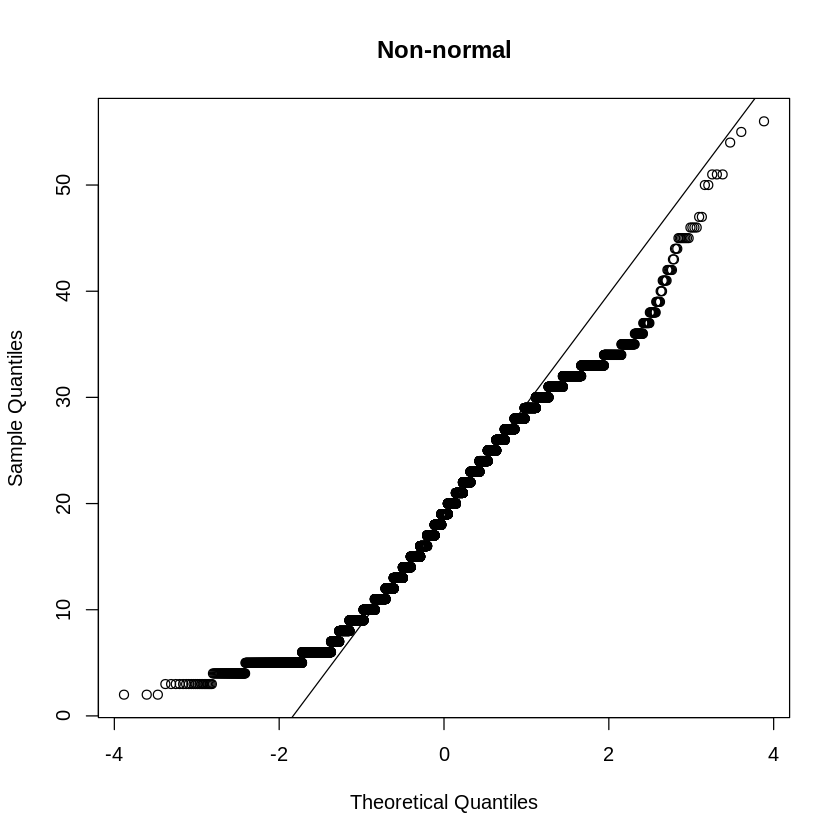

In [38]:
# QQ PLOT 
qqnorm(data$GiftCntAll, main='Non-normal') 
qqline(data$GiftCntAll) 
qqnorm(data$PromCntCardAll, main='Non-normal') 
qqline(data$PromCntCardAll)

9. Find the correlation matrix for all the variables in the dataset and plot the graph of the correlation matrix.

In [44]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
ggplot(data, aes(x = Var1, y = Var2,  fill = value))
 geom_tile()
 theme(axis.text.x=element_text(angle = -90, hjust = 0))

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Var1' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(ob

geom_tile: linejoin = mitre, na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 0
  ..$ vjust        : NULL
  ..$ angle        : num -90
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

ERROR: ignored

plot without title

In [47]:
install.packages("corrplot")
library("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [57]:
print("Original Data")
head(data)
 
# installing the library of Hmisc
install.packages("Hmisc")
library("Hmisc")
 
# computing p values of the data loaded
p_values <- rcorr(as.matrix(data))
print(p_values)

[1] "Original Data"


,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,⋯,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>
1,0,14974,0,2,4,1,3,17,13.50,9.25,⋯,13,A,0,0,59.15084,F,U,0,0,0
2,0,6294,0,1,8,0,3,20,20.00,15.88,⋯,24,A,0,23,67.00000,F,U,186800,85,0
3,1,46110,4,6,41,3,20,6,5.17,3.73,⋯,22,S,1,0,59.15084,M,U,87600,36,38750
4,1,185937,10,3,12,3,8,10,8.67,8.50,⋯,16,E,1,0,59.15084,M,U,139200,27,38942
5,0,29637,0,1,1,1,1,20,20.00,20.00,⋯,6,F,0,35,53.00000,M,U,168100,37,71509
6,1,112632,11,3,11,2,9,11,10.33,8.27,⋯,22,S,1,0,47.00000,M,H,253100,0,92514


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in storage.mode(x) <- "double":
“NAs introduced by coercion”


ERROR: ignored

In [54]:
data_numeric <- select_if(data, is.numeric)
cor_data = cor(data_numeric)
 
print("Correlation matrix")
print(cor_data)

[1] "Correlation matrix"
                     TargetB           ID      TargetD   GiftCnt36  GiftCntAll
TargetB           1.00000000  0.016803556  0.663923219  0.13782922  0.10866124
ID                0.01680356  1.000000000  0.022661673 -0.05248120 -0.13354287
TargetD           0.66392322  0.022661673  1.000000000 -0.07901731 -0.04957748
GiftCnt36         0.13782922 -0.052481195 -0.079017311  1.00000000  0.55024201
GiftCntAll        0.10866124 -0.133542870 -0.049577484  0.55024201  1.00000000
GiftCntCard36     0.13143567 -0.040244961 -0.054273287  0.84475993  0.46886050
GiftCntCardAll    0.11260009 -0.082705866 -0.050624626  0.53243492  0.91456944
GiftAvgLast      -0.07048973  0.016651290  0.336531993 -0.31170297 -0.21461730
GiftAvg36        -0.08210815  0.033260348  0.304522034 -0.34354233 -0.21962432
GiftAvgAll       -0.07084325  0.009690651  0.254028761 -0.32676956 -0.29184734
GiftAvgCard36    -0.07805738  0.028108946  0.262110060 -0.33307311 -0.20960453
GiftTimeLast     -0.1076940

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,⋯,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
TargetB,1.00,0.02,0.66,0.14,0.11,0.13,0.11,-0.07,-0.08,-0.07,⋯,0.08,0.05,0.10,0.07,0.11,-0.03,0.04,0.05,0.01,0.01
ID,0.02,1.00,0.02,-0.05,-0.13,-0.04,-0.08,0.02,0.03,0.01,⋯,-0.21,-0.16,-0.08,-0.12,-0.08,-0.15,0.00,0.25,0.03,-0.02
TargetD,0.66,0.02,1.00,-0.08,-0.05,-0.05,-0.05,0.34,0.30,0.25,⋯,0.02,0.03,0.01,0.00,-0.04,-0.07,0.01,0.11,0.00,0.02
GiftCnt36,0.14,-0.05,-0.08,1.00,0.55,0.84,0.53,-0.31,-0.34,-0.33,⋯,0.29,0.35,0.60,0.32,0.45,0.04,0.06,-0.06,0.01,-0.05
GiftCntAll,0.11,-0.13,-0.05,0.55,1.00,0.47,0.91,-0.21,-0.22,-0.29,⋯,0.79,0.24,0.43,0.77,0.60,0.06,0.17,-0.07,0.00,-0.03
GiftCntCard36,0.13,-0.04,-0.05,0.84,0.47,1.00,0.56,-0.26,-0.28,-0.25,⋯,0.21,0.28,0.64,0.24,0.41,0.03,0.04,-0.04,0.01,-0.03


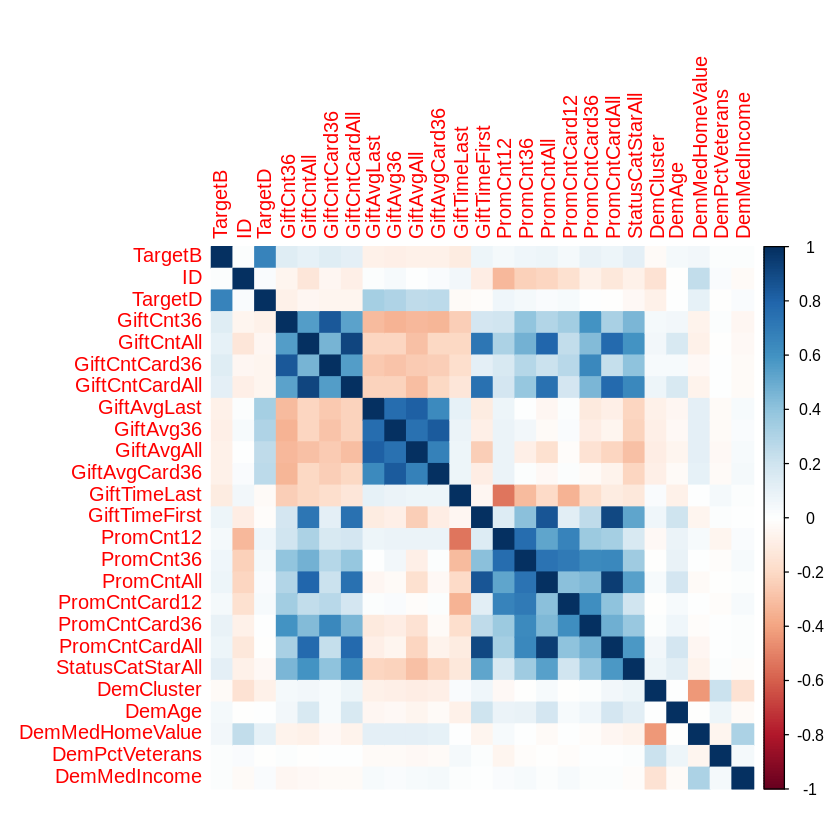

In [56]:
M<-cor(data_numeric)
head(round(M,2))
corrplot(M, method="color")

10. From the given dataset partition the data into 70-15-15 divisions so as to construct the training, validation and test datasets.

In [62]:
 spec = c(train = .70, test = .15, validate = .15)
 g = sample(cut(seq(nrow(data)),  nrow(data)*cumsum(c(0,spec)),  labels = names(spec) ))
 res = split(data, g) 
 res

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,⋯,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>
1,0,14974,0,2,4,1,3,17.00,13.50,9.25,⋯,13,A,0,0,59.15084,F,U,0,0,0
2,0,6294,0,1,8,0,3,20.00,20.00,15.88,⋯,24,A,0,23,67.00000,F,U,186800,85,0
4,1,185937,10,3,12,3,8,10.00,8.67,8.50,⋯,16,E,1,0,59.15084,M,U,139200,27,38942
5,0,29637,0,1,1,1,1,20.00,20.00,20.00,⋯,6,F,0,35,53.00000,M,U,168100,37,71509
6,1,112632,11,3,11,2,9,11.00,10.33,8.27,⋯,22,S,1,0,47.00000,M,H,253100,0,92514
7,0,123712,0,2,4,2,3,15.00,20.00,13.00,⋯,18,A,0,35,58.00000,M,H,234700,22,72868
8,0,45409,0,1,4,0,3,15.00,15.00,11.50,⋯,15,A,0,8,59.15084,U,U,207000,44,0
9,1,19094,40,1,3,0,1,35.00,35.00,28.33,⋯,22,A,0,35,59.15084,F,U,137300,32,0
11,1,102224,6,3,16,2,13,6.00,6.33,6.13,⋯,21,S,1,15,59.15084,U,U,143900,30,0
